## Import the releavant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### About the data
2126 measurements extracted from cardiotocograms and classified by expert obstetricians, into 3 classes:

- Normal
- Suspect
- Pathalogical

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318



Source :  https://www.kaggle.com/andrewmvd/fetal-health-classification

In [2]:
csv_file = 'fetal_health.csv'  ## Input data comma seperated
df = pd.read_csv(csv_file)


## Data Exploration

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.shape

(2126, 22)

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
## Checking for NULL value
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

***Data does not have any NULL/NA values :)***

We have 21 feature column and 1 label column

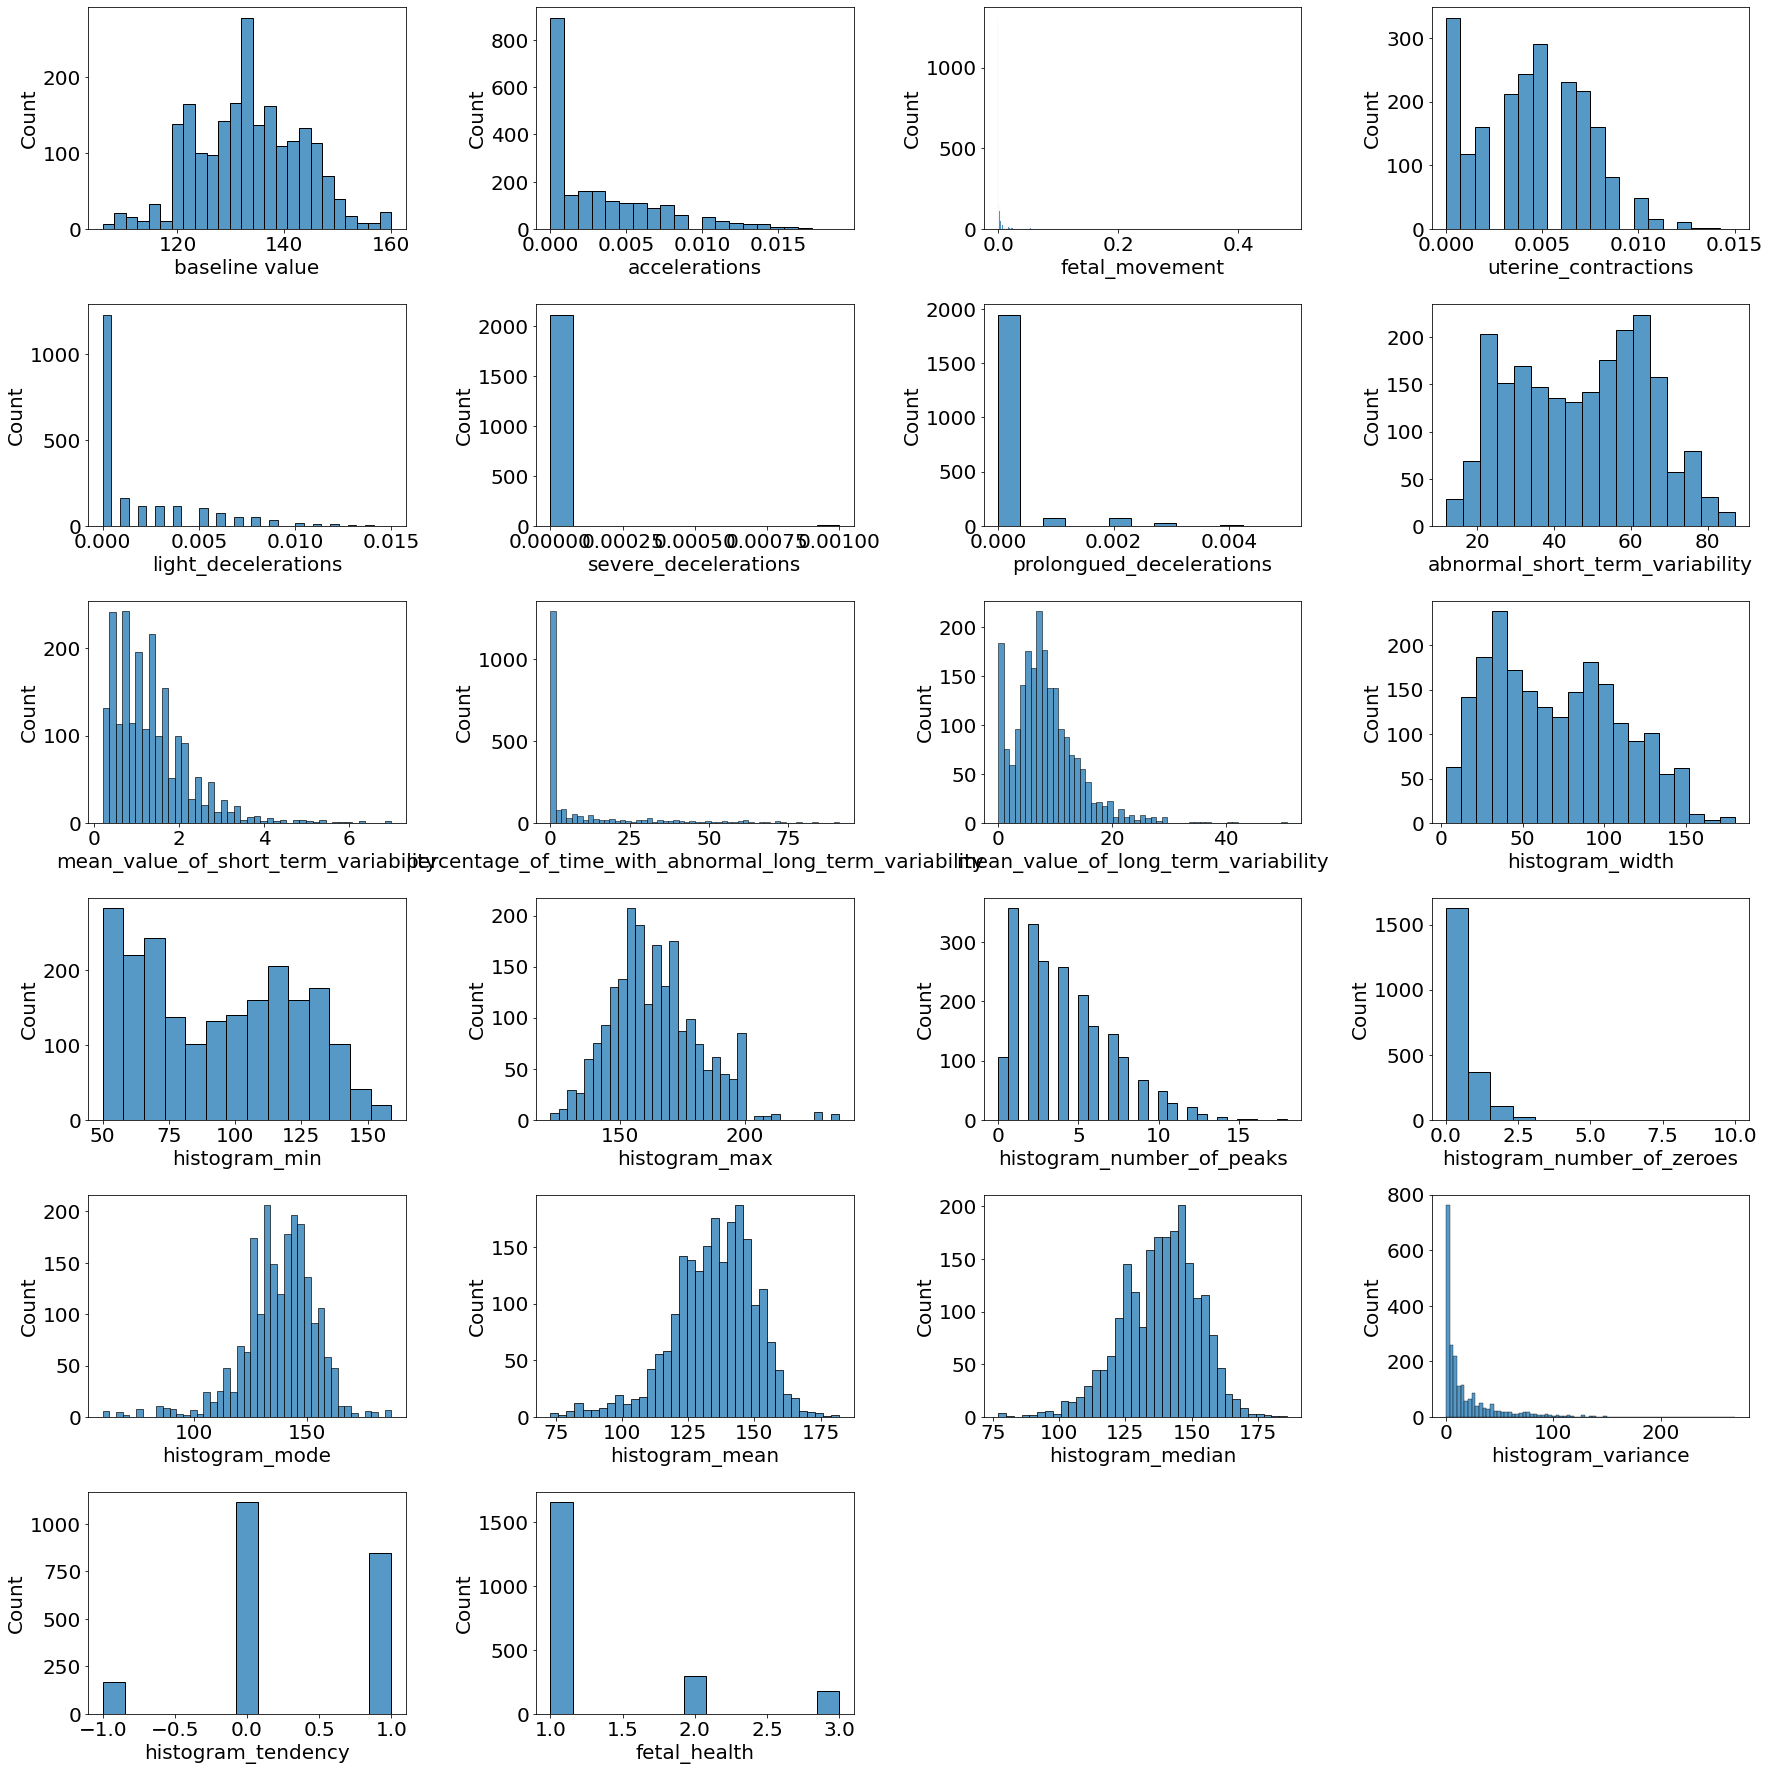

In [7]:
plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size':20})
for i, column in enumerate(df.columns):
    plt.subplot(6,4, i+1)
    sns.histplot(data=df[column])
plt.tight_layout()
plt.show()

## OUTLIERS 

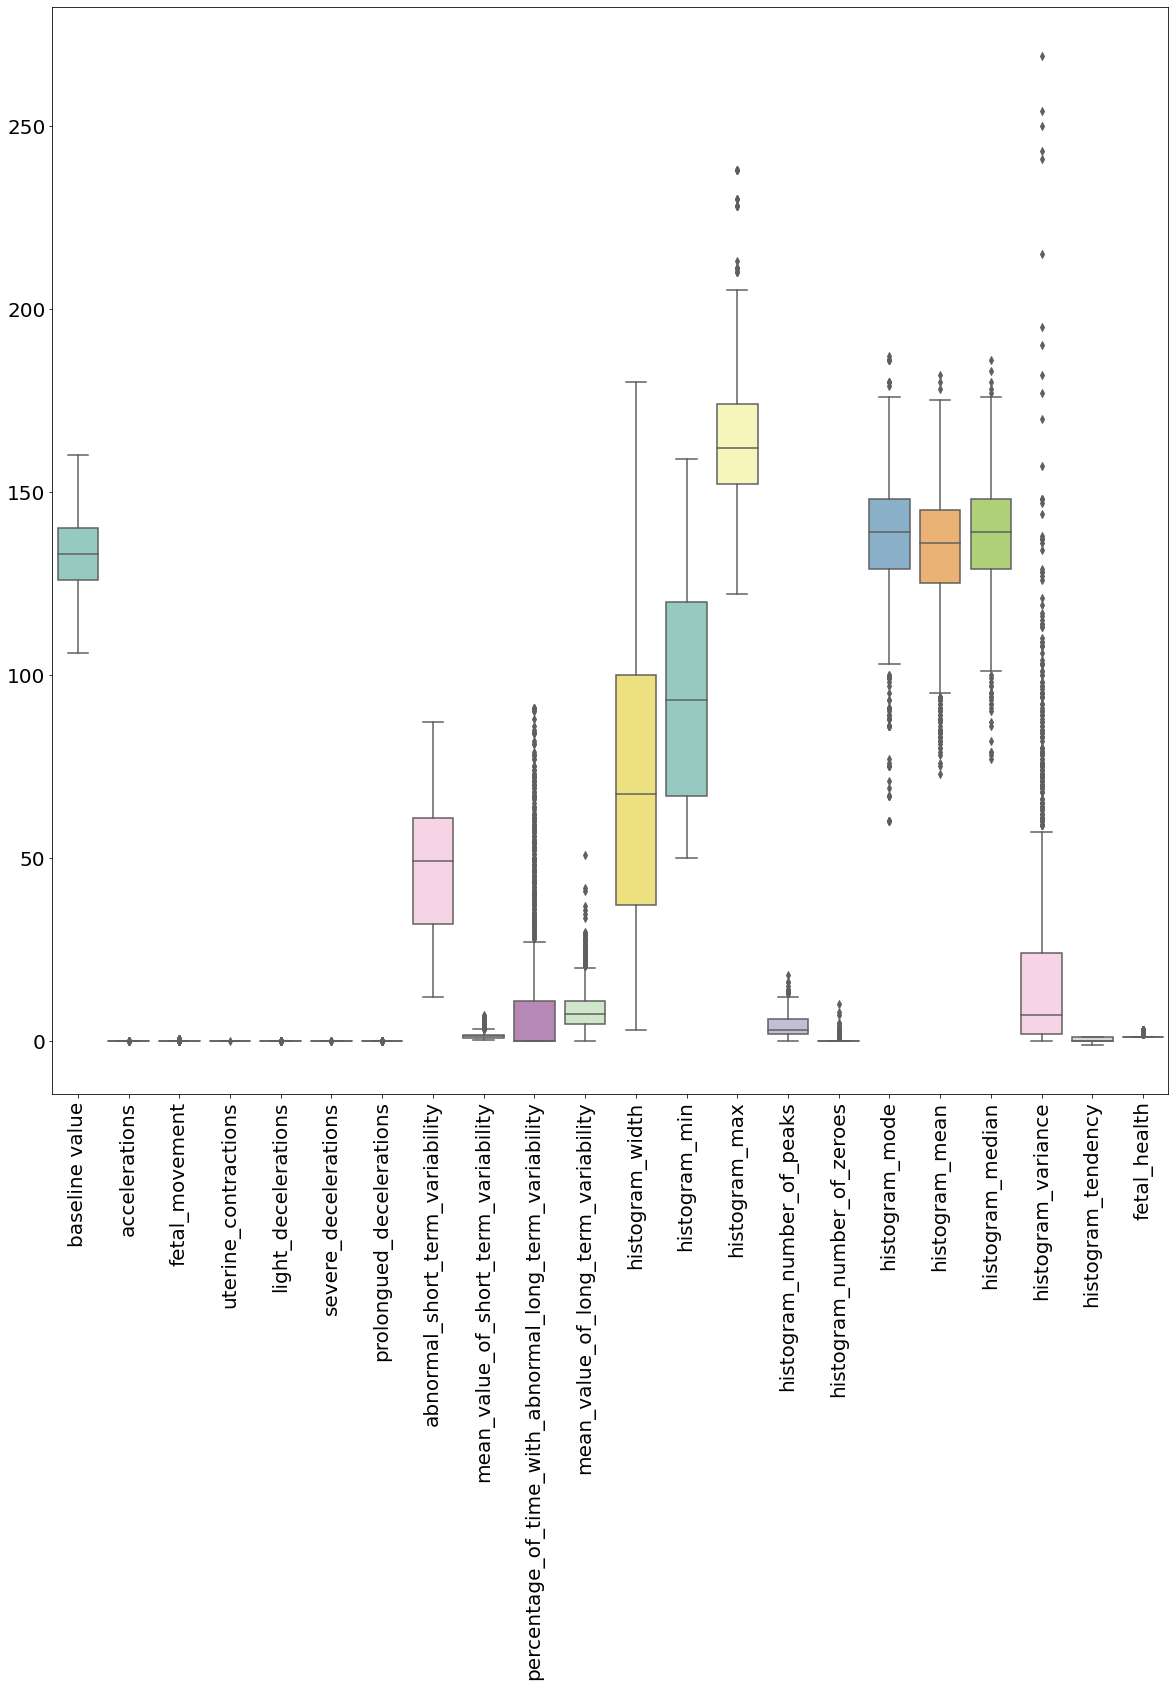

In [8]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':20})
sns.boxplot(data = df,palette = "Set3")
plt.xticks(rotation=90)
plt.show()

In [9]:
from sklearn.covariance import EllipticEnvelope

## EllipticEnvelope Outlier Detection (You can use LOF, 

In [10]:
model1 = EllipticEnvelope(contamination = 0.1)

In [11]:
df1 =df.drop(['fetal_health'], axis=1)
x = df1.values
y= model1.fit_predict(x)

C:\Users\Rajdeep Shil\Anaconda3\envs\tf\lib\site-packages\sklearn\covariance\_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


In [12]:
mask = y != -1

In [13]:
X_data = x[mask,:]
Y_data = df['fetal_health'].values
Y  = Y_data[mask]

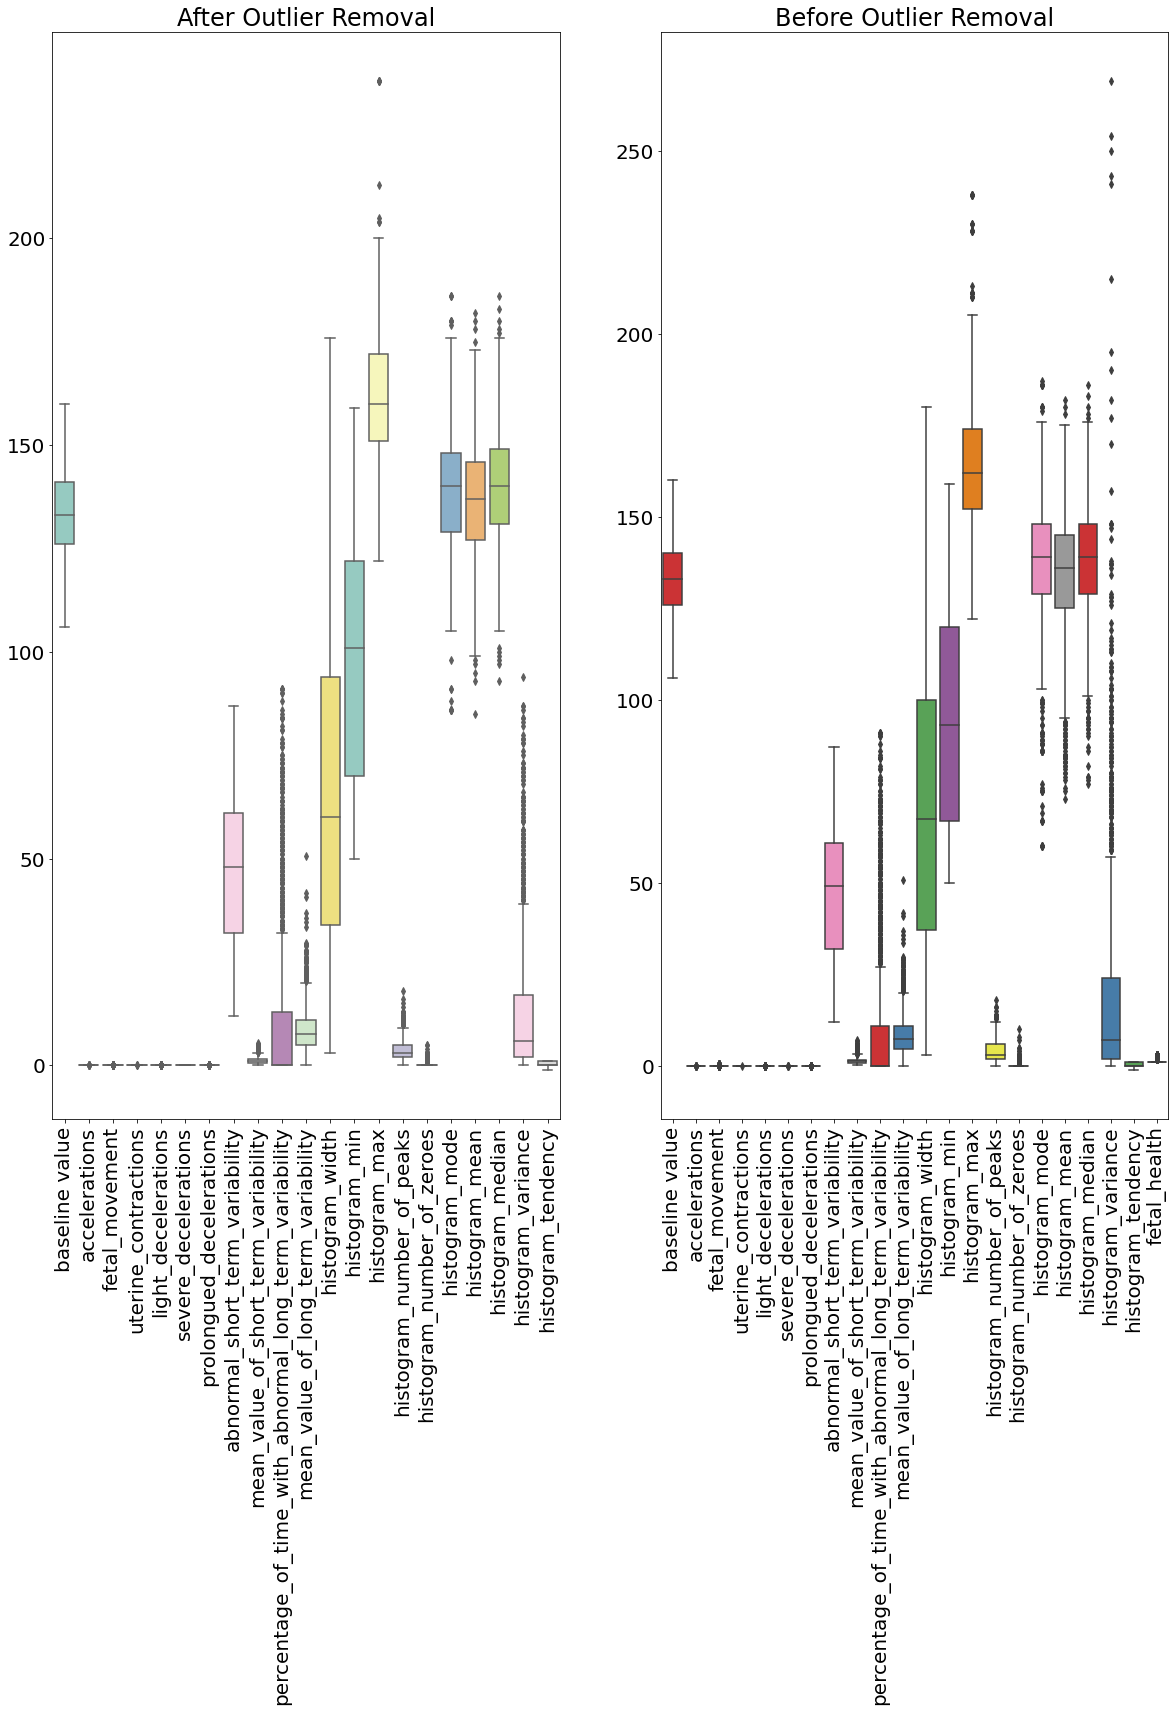

In [14]:
df2 = df1[mask]
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':20})
plt.subplot(1,2, 1)
sns.boxplot(data = df2,palette = "Set3")
plt.xticks(rotation=90)
plt.title("After Outlier Removal")
plt.subplot(1,2, 2)
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.title("Before Outlier Removal")
plt.show()

In [15]:
Y  = Y_data[mask]
df3 =df2.copy()
df3['fetal_health'] = Y

In [16]:
df2.shape

(1913, 21)

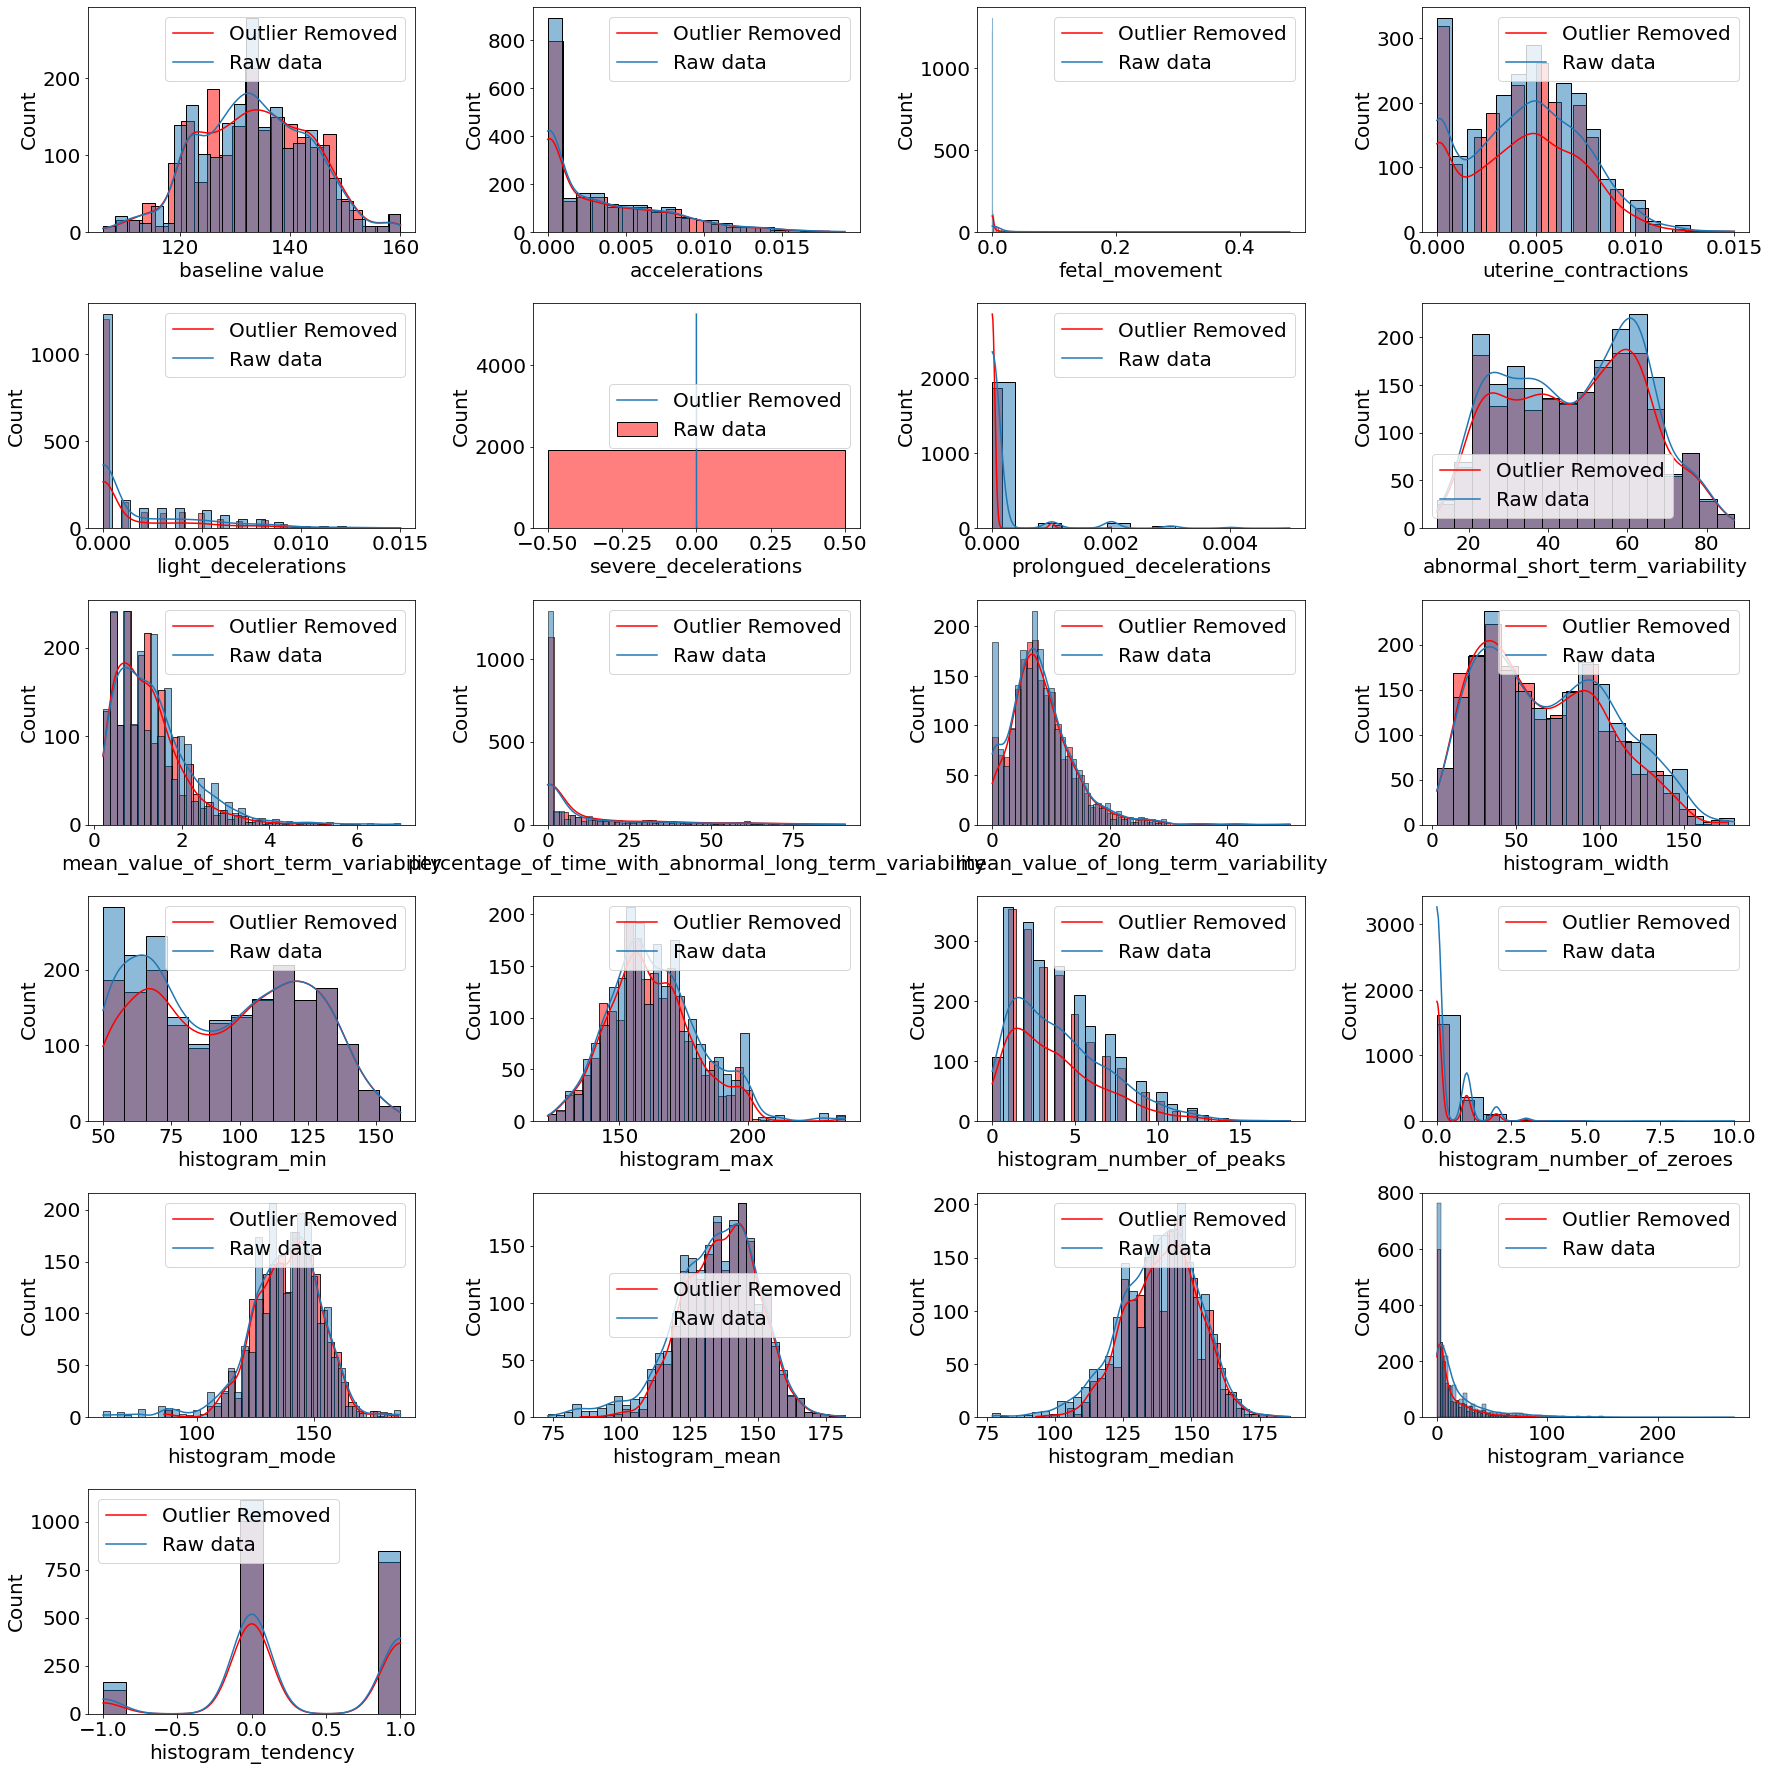

In [17]:
plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size':20})
for i, column in enumerate(df2.columns):
    plt.subplot(6,4, i+1)
    sns.histplot(data=df2[column],kde=True, color='r')
  
    sns.histplot(data=df[column], kde=True)
    plt.legend(labels=["Outlier Removed", "Raw data"])
    
plt.tight_layout()
plt.show()

### Above plot shows the difference between data before and after outlier removal

## Correlation Matrix

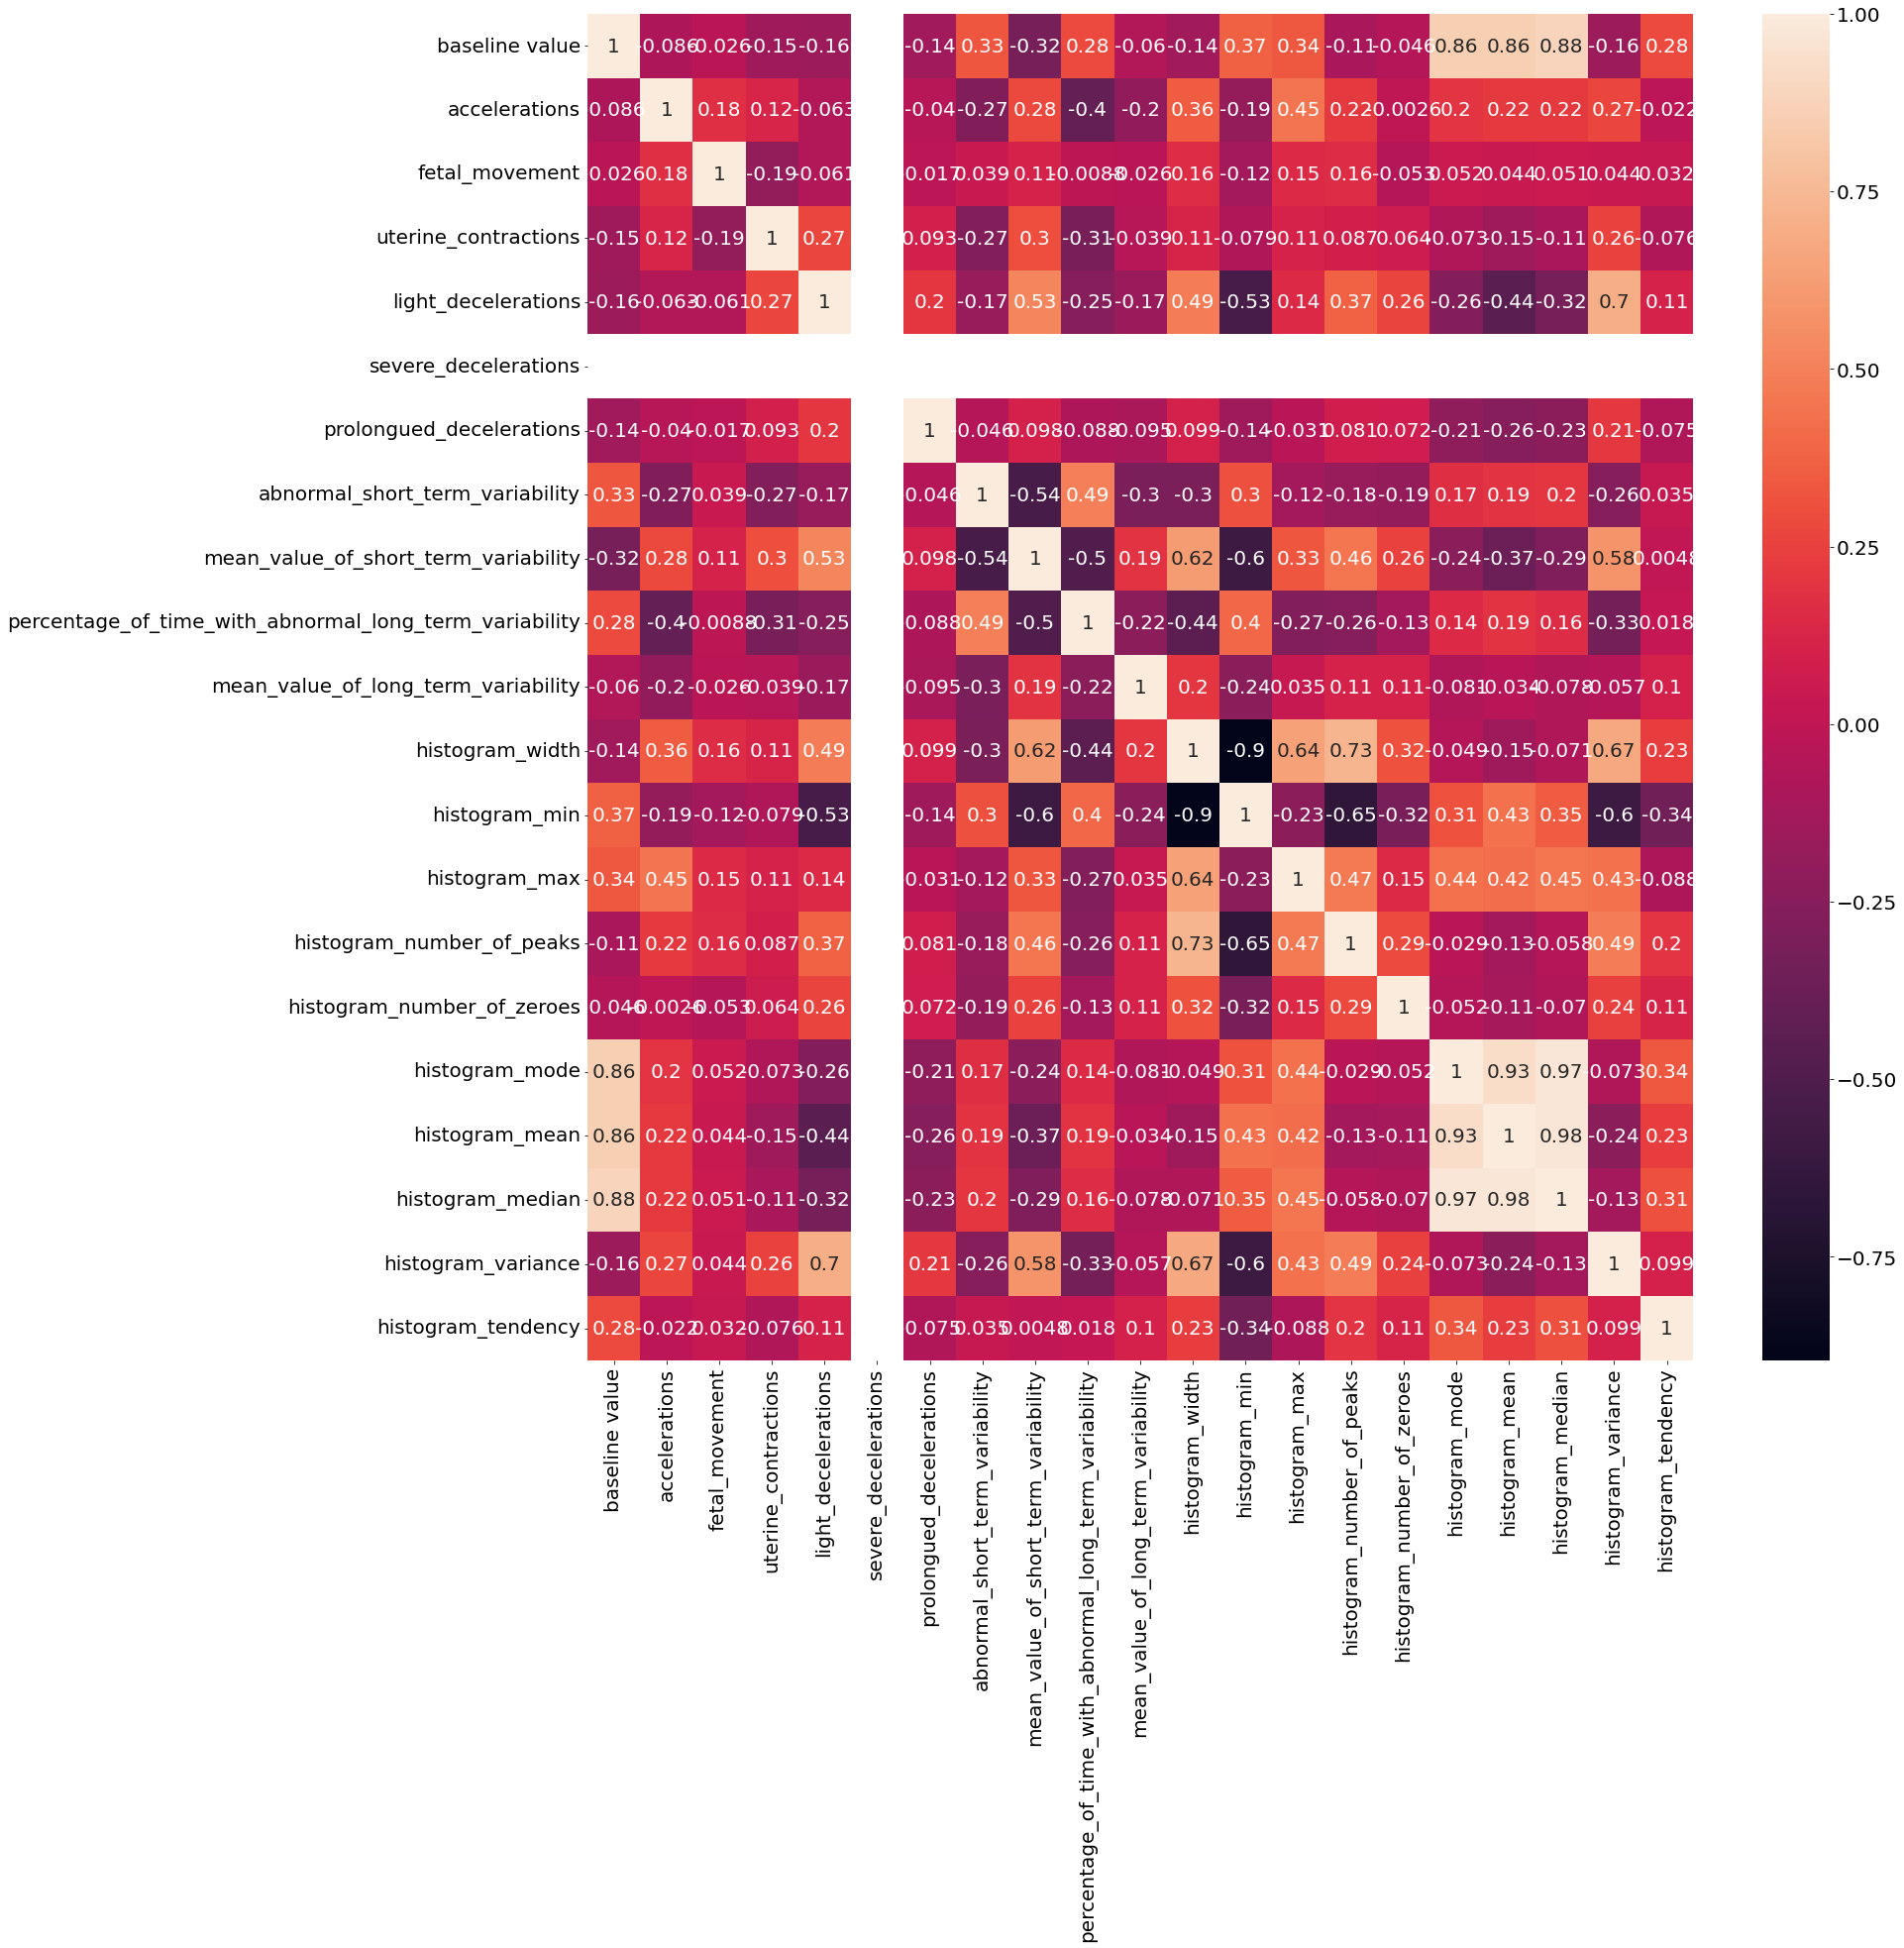

In [18]:
plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size':20})
corr = sns.heatmap(df2.corr(), annot=True)

### Droping feature is difficult due to lack of domain knowledge

In [20]:
df3.fetal_health.value_counts()

1.0    1555
2.0     278
3.0      80
Name: fetal_health, dtype: int64

**Target class is higly imbalanced**

In [21]:
from sklearn.utils import resample
majority_class_max= df3.fetal_health.value_counts().max()

df_fh_1 =df3[df3.fetal_health==1]
df_fh_2 =df3[df3.fetal_health==2]
df_fh_3 =df3[df3.fetal_health==3]

df_fh_2_un= resample(df_fh_2, 
                     replace=True,  #Sampling with replacement
                     n_samples=majority_class_max, random_state=123)
df_fh_3_un= resample(df_fh_3, 
                     replace=True,  #Sampling with replacement
                     n_samples=majority_class_max, random_state=123)
## combine majority class with resampled minority class
df_un = pd.concat([df_fh_1, df_fh_2_un,df_fh_3_un])

df_un.fetal_health.value_counts()

1.0    1555
2.0    1555
3.0    1555
Name: fetal_health, dtype: int64

### In resampling we duplicating minority class to enhance accuracy

In [24]:
## Seperating X and Y for modelling

X = df_un.drop('fetal_health', axis=1)
Y = df_un.fetal_health.values

### Split data set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

### Standardization (From plots above it is clear some features are not of same scale)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100
        MLA_compare.loc[row_index, 'Classification_report']= classification_report(y_test,y_pred)
        print(MLA_name, "Done")
        
        print('Confusion Matrix: \n\n')
        plt.style.use("ggplot")
        cm = confusion_matrix(y_test,y_pred)
        plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)
        plt.show()
        row_index+=1

## Model 

GradientBoostingClassifier Done
Confusion Matrix: 




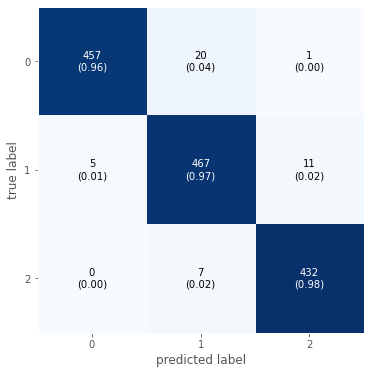

RandomForestClassifier Done
Confusion Matrix: 




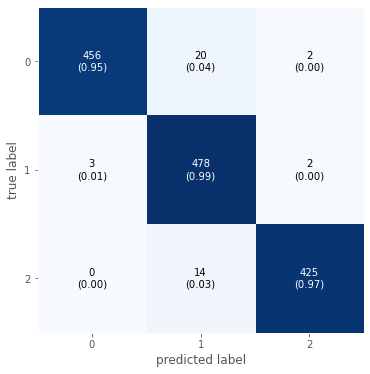

SGDClassifier Done
Confusion Matrix: 




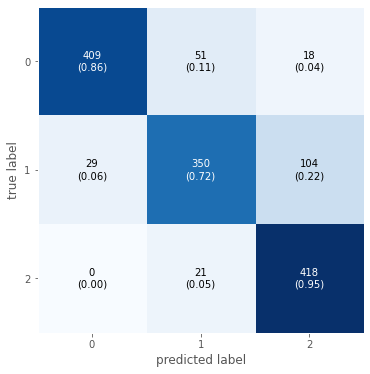

LogisticRegression Done
Confusion Matrix: 




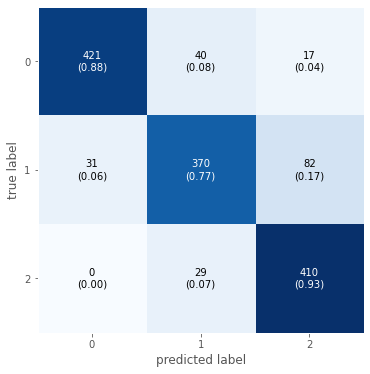

DecisionTreeClassifier Done
Confusion Matrix: 




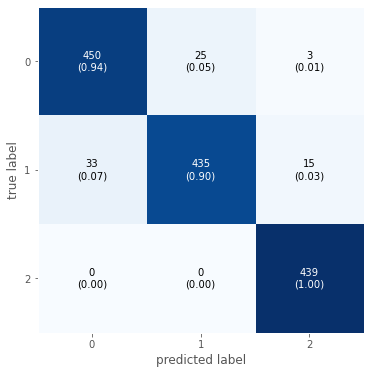

ExtraTreeClassifier Done
Confusion Matrix: 




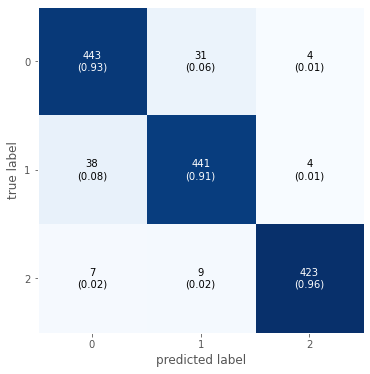

XGBClassifier Done
Confusion Matrix: 




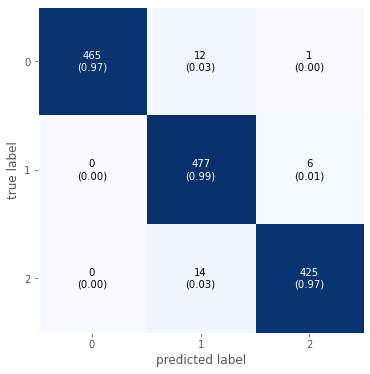

CatBoostClassifier Done
Confusion Matrix: 




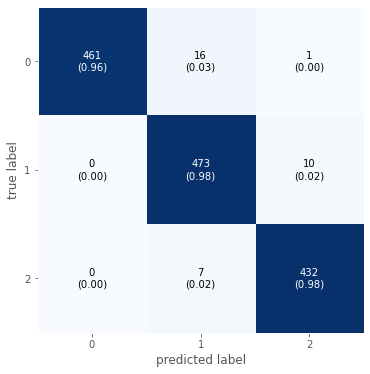

In [54]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score

from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.SGDClassifier(),
    linear_model.LogisticRegression(),

    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    XGBClassifier(eval_metric="mlogloss"),
    CatBoostClassifier(silent=True)  
]
MLA_testing(MLA=MLA, X_train=x_train, X_test=x_test)

In [55]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy,Classification_report
0,XGBClassifier,97.642857,98.958556,precision recall f1-score ...
1,CatBoostClassifier,97.571429,98.713533,precision recall f1-score ...
2,RandomForestClassifier,97.071429,98.713908,precision recall f1-score ...
3,GradientBoostingClassifier,96.857143,97.948162,precision recall f1-score ...
4,DecisionTreeClassifier,94.571429,98.009231,precision recall f1-score ...
5,ExtraTreeClassifier,93.357143,97.641695,precision recall f1-score ...
6,LogisticRegression,85.785714,86.341251,precision recall f1-score ...
7,SGDClassifier,84.071429,83.983696,precision recall f1-score ...


***XGB Classifier clearly has higher performance compared to the other models***

**Future Studies: This model has many features and hence we can use Neural Nets in future. However, as most of the simple classifiers are giving excelled accuracy we may not need Neural nets or other deep learning techniques.**